In [26]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import color

In [43]:
img2 = mpimg.imread('detection_data/images/271_20210909040216.jpg')

In [34]:
img = cv.imread('detection_data/images/192_20200715165926.jpg')   # you can read in images with opencv
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

In [67]:
img = mpimg.imread('detection_data/images/192_20200715165926.jpg')
# img_hsv = color.rgb2hsv(img)

In [27]:
def bincount_app(a):
    a2D = a.reshape(-1,a.shape[-1])
    col_range = (256, 256, 256) # generically : a2D.max(0)+1
    a1D = np.ravel_multi_index(a2D.T, col_range)
    return np.unravel_index(np.bincount(a1D).argmax(), col_range)

In [34]:
def unique_count_app(a):
    colors, count = np.unique(a.reshape(-1,a.shape[-1]), axis=0, return_counts=True)
    return colors[count.argmax()]

In [66]:
bincount_app(img)

(174, 198, 84)

In [41]:
bincount_app(img2)

(241, 158, 36)

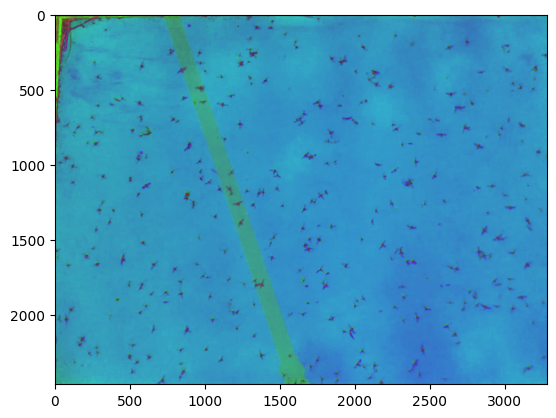

In [31]:
plt.imshow(img_hsv)

In [ ]:

img = cv.imread('shuttle.jpg')   # you can read in images with opencv
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

hsv_color1 = np.asarray([0, 0, 255])   # white!
hsv_color2 = np.asarray([30, 255, 255])   # yellow! note the order

mask = cv.inRange(img_hsv, hsv_color1, hsv_color2)

plt.imshow(mask, cmap='gray')   # this colormap will display in black / white
plt.show()

# next try

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def nothing(x):
    pass

def hsv_calc():
    # cap = cv2.VideoCapture(0)
    cv2.namedWindow("Trackbars",)
    cv2.createTrackbar("lh","Trackbars",0,179,nothing)
    cv2.createTrackbar("ls","Trackbars",0,255,nothing)
    cv2.createTrackbar("lv","Trackbars",0,255,nothing)
    cv2.createTrackbar("uh","Trackbars",179,179,nothing)
    cv2.createTrackbar("us","Trackbars",255,255,nothing)
    cv2.createTrackbar("uv","Trackbars",255,255,nothing)
    while True:
        # ret, frame = cap.read()
        frame = cv2.imread('detection_data/images/103_20200724013941.jpg')
        height, width = frame.shape[:2]
        #frame = cv2.resize(frame,(width/5, height/5), interpolation = cv2.INTER_CUBIC)
        hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)

        lh = cv2.getTrackbarPos("lh","Trackbars")
        ls = cv2.getTrackbarPos("ls","Trackbars")
        lv = cv2.getTrackbarPos("lv","Trackbars")
        uh = cv2.getTrackbarPos("uh","Trackbars")
        us = cv2.getTrackbarPos("us","Trackbars")
        uv = cv2.getTrackbarPos("uv","Trackbars")

        l_blue = np.array([lh,ls,lv])
        u_blue = np.array([uh,us,uv])
        mask = cv2.inRange(hsv, l_blue, u_blue)
        result = cv2.bitwise_or(frame,frame,mask=mask)

        #cv2.imshow("frame",frame)
        cv2.imshow("mask",mask)
        cv2.imshow("result",result)
        key = cv2.waitKey(1)
        if key == 27:
            break
    cap.release()
    cv2.destroyAllWindows()

hsv_calc()

KeyboardInterrupt: 

# next try

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import io, measure

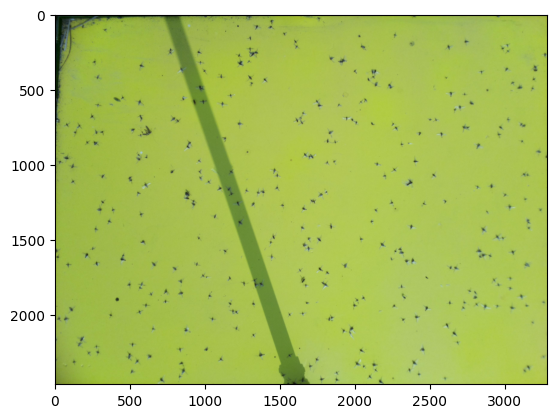

In [91]:
img = io.imread('detection_data/images/103_20200724013941.jpg')
plt.imshow(img)

In [68]:
img = mpimg.imread('detection_data/images/192_20200715165926.jpg')
# img_hsv = color.rgb2hsv(img)

In [92]:
bincount_app(img)

(174, 198, 84)

In [93]:
green = np.uint8([[[174,198,84 ]]])
hsv_green = cv.cvtColor(green,cv.COLOR_RGB2HSV)
print(hsv_green)

[[[ 36 147 198]]]


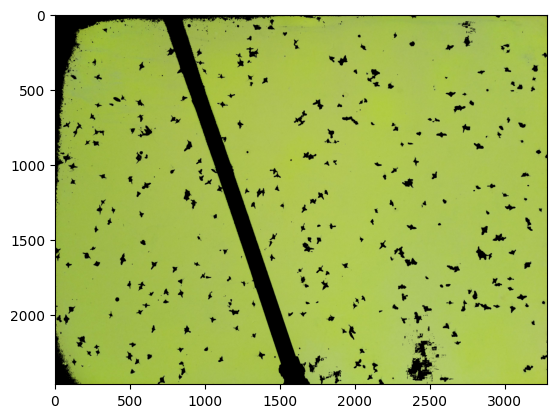

In [101]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, (20, 120, 170), (90, 255, 220))
masked = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(masked)